In [2]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
import plotly.graph_objects as go

from plotly.subplots import make_subplots
import plotly.express as px

import seaborn as sns

a4_dims = (11.7, 8.27)
# sns.set(font_scale=2, rc={'text.usetex' : True})
sns.set(font_scale=2)
sns.set_style("whitegrid", rc={"grid.linewidth": 5})
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman', 'font_scale':10})

## Computation time

In [3]:
stats_compt_time = pd.read_csv('stats_without_constraints_compt_time.csv')
stats_compt_time

,Unnamed: 0,num_variables,activation_function,absorption_criterion,ascent_stop_criterion,stopping_criterion_type,step_type,max_iterations,direction_type,initial_ascent_type,gamma,theta,f_value,binary,t_hmip,t_cplex,f_cplex,t_cplex_relax,f_cplex_relax
0,0,2,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,0.9,0.01,-0.171399,0.095055,0.042647,0.029630,-1.714355e-01,0.034902,-1.714355e-01
1,1,2,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,0.9,0.01,-0.028782,0.224817,0.005260,0.013952,-2.878166e-02,0.025589,-2.878166e-02
2,2,2,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,0.9,0.01,-0.702012,0.000000,0.002874,0.020073,-7.020117e-01,0.026653,-7.020117e-01
3,3,2,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,0.9,0.01,0.000000,0.000000,0.006681,0.038438,0.000000e+00,0.021760,0.000000e+00
4,4,2,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,0.9,0.01,0.002030,0.073437,0.044471,0.033090,1.497621e-09,0.033097,1.497621e-09
5,5,2,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,0.9,0.01,0.000000,0.000000,0.005243,0.013993,0.000000e+00,0.026952,0.000000e+00
6,6,2,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,0.9,0.01,0.000000,0.000000,0.005854,0.020154,0.000000e+00,0.027493,0.000000e+00
7,7,2,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,0.9,0.01,0.000000,0.000000,0.029933,0.020242,0.000000e+00,0.027478,0.000000e+00
8,8,2,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,0.9,0.01,0.000000,0.000000,0.005239,0.014420,0.000000e+00,0.025971,0.000000e+00
9,9,2,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,0.9,0.01,0.000000,0.000000,0.003891,0.021618,0.000000e+00,0.027158,0.000000e+00


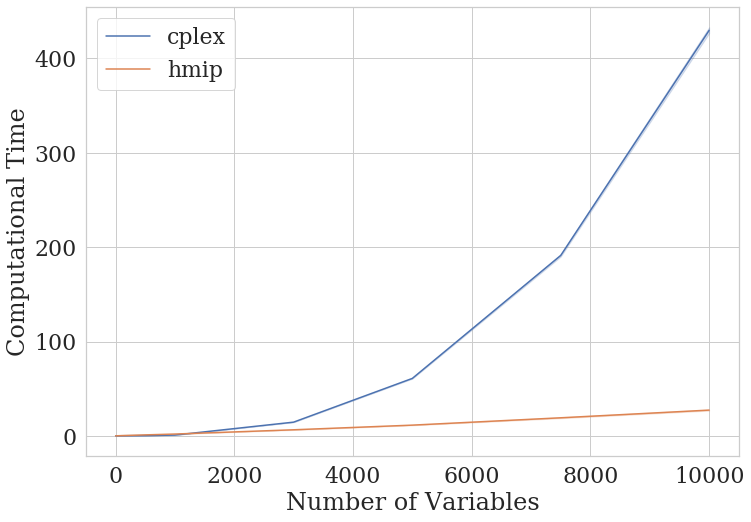

In [4]:
fig, ax = plt.subplots(figsize=a4_dims)
# ax = sns.lineplot(y="t_cplex_relax", x="num_variables", ax=ax, data=stats_compt_time, label="cplex_relax")
ax = sns.lineplot(y="t_cplex", x="num_variables", ax=ax, data=stats_compt_time, label="cplex")
ax = sns.lineplot(y="t_hmip", x="num_variables", ax=ax, data=stats_compt_time, label="hmip")
ax.set(xlabel='Number of Variables', ylabel='Computational Time')
plt.savefig('compt_time.png')

## Without Constraints

In [18]:
stats_wo_cst = pd.read_csv('stats_without_constraints.csv')
stats_wo_cst[stats_wo_cst['direction_type'] == 'binary']

,Unnamed: 0,num_variables,activation_function,absorption_criterion,ascent_stop_criterion,stopping_criterion_type,step_type,max_iterations,direction_type,initial_ascent_type,gamma,theta,f_value,binary,t_hmip,t_cplex,f_cplex,t_cplex_relax,f_cplex_relax
1800,1800,2,pwl,NaN,0.01,gradient,classic,500,binary,binary_neutral_ascent,0.9,0.01,0.000000,0.000000,0.007355,0.025911,0.000000e+00,0.019921,0.000000e+00
1801,1801,2,pwl,NaN,0.01,gradient,classic,500,binary,binary_neutral_ascent,0.9,0.01,-1.037742,0.237242,0.055754,0.019306,-1.044614e+00,0.019289,-1.044614e+00
1802,1802,2,pwl,NaN,0.01,gradient,classic,500,binary,binary_neutral_ascent,0.9,0.01,-0.003481,0.089807,0.010777,0.011976,-3.481409e-03,0.020086,-3.481409e-03
1803,1803,2,pwl,NaN,0.01,gradient,classic,500,binary,binary_neutral_ascent,0.9,0.01,-0.293106,0.049076,0.075484,0.018769,-2.937353e-01,0.028058,-2.937353e-01
1804,1804,2,pwl,NaN,0.01,gradient,classic,500,binary,binary_neutral_ascent,0.9,0.01,0.000000,0.000000,0.005675,0.014150,0.000000e+00,0.039932,1.692904e-09
1805,1805,2,pwl,NaN,0.01,gradient,classic,500,binary,binary_neutral_ascent,0.9,0.01,0.000000,0.000000,0.009238,0.016438,0.000000e+00,0.026843,0.000000e+00
1806,1806,2,pwl,NaN,0.01,gradient,classic,500,binary,binary_neutral_ascent,0.9,0.01,-0.512786,0.000000,0.006394,0.032984,-5.127855e-01,0.033437,-5.127855e-01
1807,1807,2,pwl,NaN,0.01,gradient,classic,500,binary,binary_neutral_ascent,0.9,0.01,-0.055687,0.249499,0.073958,0.017087,-6.112261e-02,0.025849,-6.112261e-02
1808,1808,2,pwl,NaN,0.01,gradient,classic,500,binary,binary_neutral_ascent,0.9,0.01,0.000000,0.000000,0.011571,0.014626,0.000000e+00,0.026998,0.000000e+00
1809,1809,2,pwl,NaN,0.01,gradient,classic,500,binary,binary_neutral_ascent,0.9,0.01,-0.066304,0.045132,0.029057,0.020411,-6.630402e-02,0.042413,-1.247873e-01


In [16]:
stats_wo_cst = stats_wo_cst[['num_variables', 'f_value', 'f_cplex', 'f_cplex_relax', 't_hmip', 't_cplex', 't_cplex_relax', 'binary', 'activation_function', 'direction_type']]
stats_wo_cst['diff'] = (stats_wo_cst['f_value'] - stats_wo_cst['f_cplex']) / stats_wo_cst['num_variables']


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



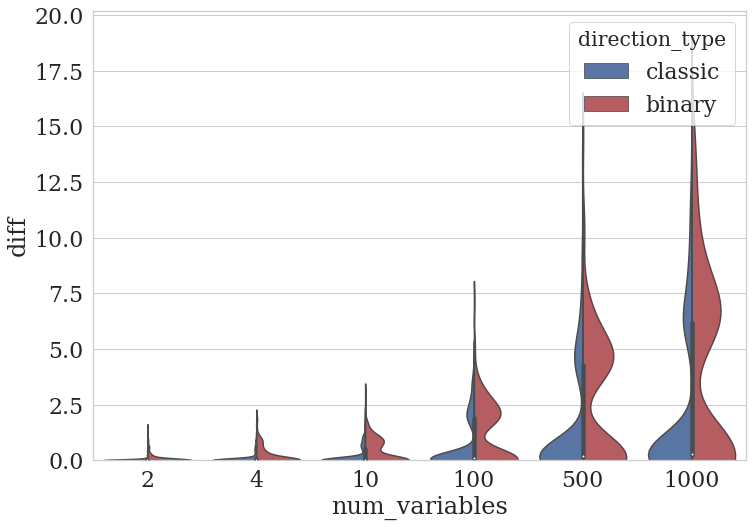

In [17]:
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.violinplot(data=stats_wo_cst, x='num_variables', y='diff', scale="width", 
               palette={"classic": "b", "binary": "r"}, hue="direction_type", split=True)
ax.set(ylim=(0, None))
plt.savefig('without_constraints_direction_type.png')

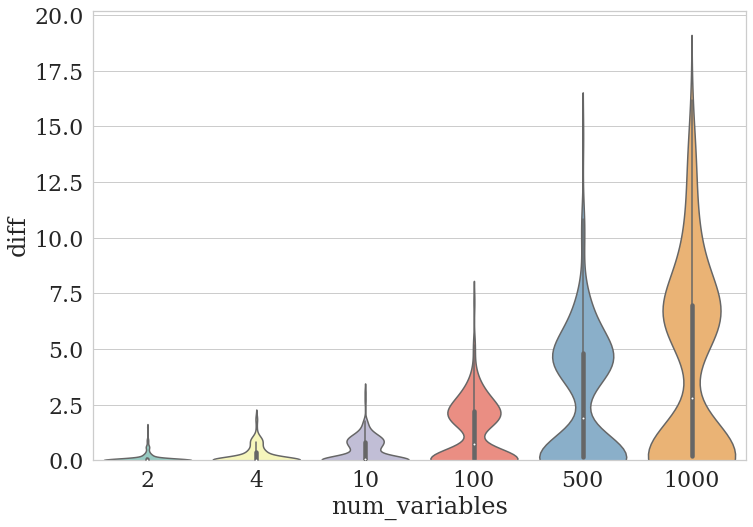

In [8]:
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.violinplot(data=stats_wo_cst[stats_wo_cst['direction_type'] == 'binary'], x='num_variables', 
               y='diff', scale="width", palette="Set3", figsize=(10,12))
ax.set(ylim=(0, None))
plt.savefig('without_constraints_binary.png')

## With Constraints

In [9]:
stats_wt_cst = pd.read_csv('stats_with_constraints.csv')
stats_wt_cst['diff'] = (stats_wt_cst['f_value'] - stats_wt_cst['f_cplex']) / stats_wt_cst['num_variables']
stats_wt_cst

,Unnamed: 0,num_variables,activation_function,absorption_criterion,ascent_stop_criterion,stopping_criterion_type,step_type,max_iterations,direction_type,initial_ascent_type,...,f_value,norm_eq,norm_ineq,binary,t_hmip,t_cplex,f_cplex,t_cplex_relax,f_cplex_relax,diff
0,0,2,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,...,0.053729,0.050096,0.093446,0.118490,0.065377,0.037662,0.051823,0.031674,0.051823,0.000953
1,1,2,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,...,-1.255903,0.178520,0.587995,0.091677,0.065922,0.036011,-1.424836,0.026266,-1.424836,0.084467
2,2,2,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,...,-0.186652,0.108841,0.078561,0.086612,0.070672,0.023183,-0.197009,0.046361,-0.197009,0.005178
3,3,2,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,...,0.754298,0.007457,0.005672,0.068540,0.061369,0.034602,0.371343,0.027200,0.371343,0.191478
4,4,2,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,...,0.869016,0.045391,0.248682,0.121761,0.068235,0.029797,0.823024,0.020489,0.823024,0.022996
5,5,2,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,...,-0.260971,0.011526,0.004025,0.000000,0.053237,0.024903,-0.261583,0.027133,-0.261583,0.000306
6,6,2,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,...,1.126847,0.420421,0.647485,0.000000,0.005653,0.028514,0.800136,0.015386,0.800136,0.163356
7,7,2,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,...,0.078724,0.027469,0.013190,0.123510,0.072778,0.020659,-0.079523,0.031344,-0.080886,0.079124
8,8,2,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,...,0.138712,0.106723,0.248119,0.106539,0.063781,0.035206,0.071997,0.027598,0.071997,0.033358
9,9,2,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,...,10.370685,0.162812,0.116020,0.200769,0.057998,0.038487,0.661211,0.037314,0.661211,4.854737


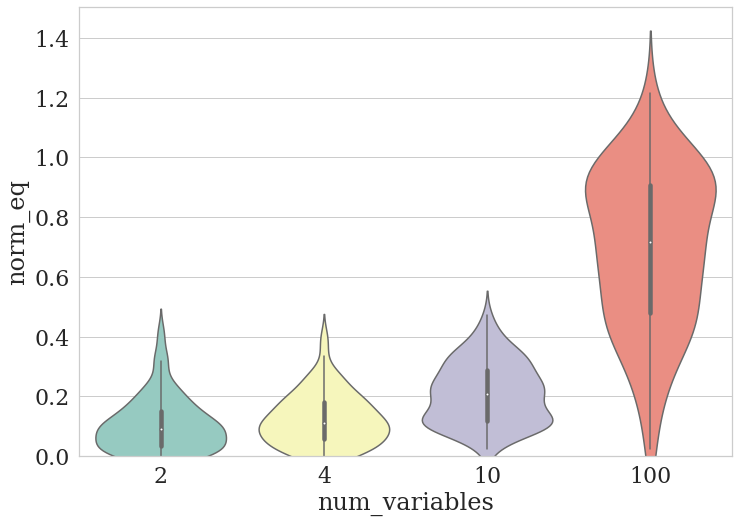

In [10]:
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.violinplot(data=stats_wt_cst, x='num_variables', y='norm_eq', 
               scale="width", palette="Set3", figsize=(10,12))
ax.set(ylim=(0, None))
plt.savefig('norm_eq.png')

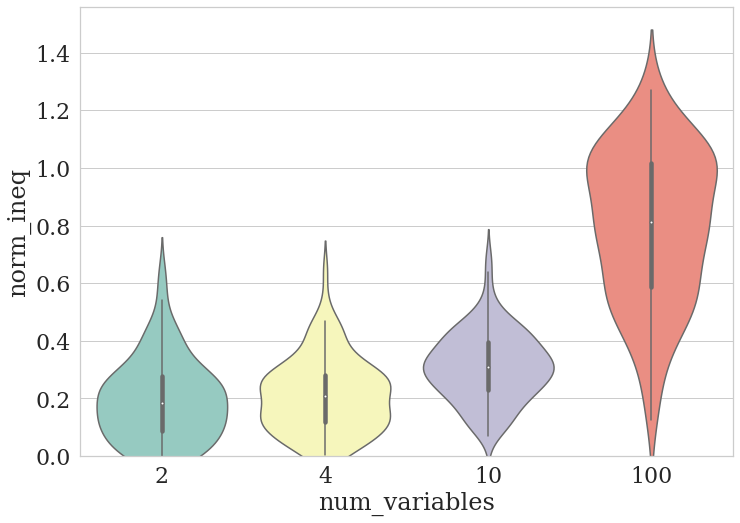

In [11]:
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.violinplot(data=stats_wt_cst, x='num_variables', y='norm_ineq', 
               scale="width", palette="Set3", figsize=(10,12))
ax.set(ylim=(0, None))
plt.savefig('norm_ineq.png')

ValueError: There must be exactly two hue levels to use `split`.'

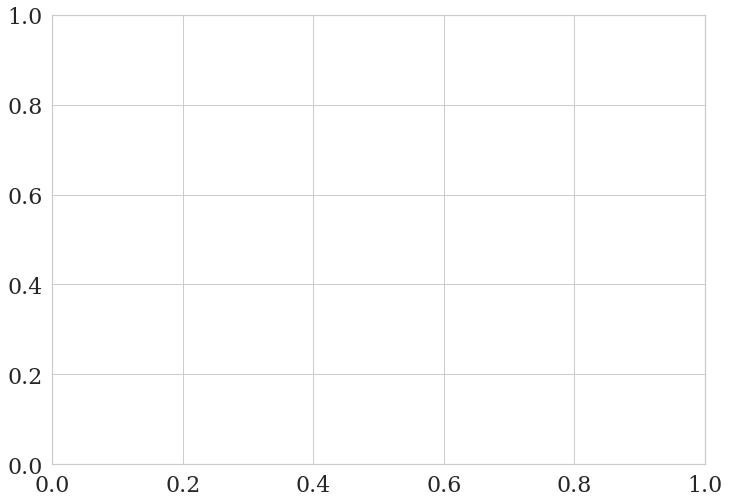

In [12]:
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.violinplot(data=stats_wt_cst, x='num_variables', y='diff', scale="width", 
               palette={"classic": "b", "binary": "r"}, hue="direction_type", split=True)
ax.set(ylim=(0, None))
plt.savefig('direction_type.png')